# Matrices 

In [64]:
pip install matplotlib 

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\a\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [17]:
import numpy as np
from PIL import Image 
import matplotlib.pyplot as plt

In [18]:
matrix = np.array(
    [
    [1,2,3],
    [4,5,6],
    [7,8,9]
]
)

In [19]:
matrix.shape

(3, 3)

In [20]:
np.random.randint(5, size=(4, 4))

array([[1, 4, 3, 2],
       [0, 1, 2, 3],
       [1, 1, 4, 4],
       [0, 0, 2, 1]])

In [43]:
def set_random_matrix(size: int) -> list[list]:
    from random import random

    matrix = [[0]*size]*size
    for i in range(size ):
        for j in range(size ):
            
            matrix[i][j] = round(random()*10, ndigits=2)
            
    return matrix

def random_matrix(size : int) -> list:
    matrix = set_random_matrix(size)

    return matrix

In [62]:
random_matrix(4)[0]

[1.51, 8.96, 3.79, 1.83]

In [61]:
random_matrix(4)[0][0:3]

[4.61, 6.7, 1.71]

## Matriz identidad

In [45]:
identity = np.identity(3)

In [57]:
type(identity)


numpy.ndarray

In [51]:
identity_manual = np.array([
    [1,0,0],
    [0,1,0],
    [0,0,1]
])

### Tests

In [52]:
np.testing.assert_equal(identity, identity_manual)

In [53]:
matrix_2 = np.array([
    [1,2,3],
    [4,5,6],
    [7,8,9]
])

In [54]:
matrix_2.diagonal()

array([1, 5, 9])

In [29]:
identity

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [55]:
identity[:2]

array([[1., 0., 0.],
       [0., 1., 0.]])

## Trabajando con imagenes

In [65]:
img = Image.open('./image.jpg')
resized =img.resize((240,240))

In [68]:
resized[:100]

TypeError: 'Image' object is not subscriptable

In [69]:
iresized= np.asarray(resized)

In [73]:
iresized

array([[[14, 12, 13],
        [14, 12, 13],
        [14, 12, 13],
        ...,
        [14, 12, 13],
        [13, 11, 12],
        [13, 11, 12]],

       [[14, 12, 13],
        [14, 12, 13],
        [14, 12, 13],
        ...,
        [14, 12, 13],
        [13, 11, 12],
        [13, 11, 12]],

       [[14, 12, 13],
        [14, 12, 13],
        [14, 12, 13],
        ...,
        [14, 13, 12],
        [16, 12, 11],
        [16, 12, 11]],

       ...,

       [[ 5,  5,  5],
        [ 5,  5,  5],
        [ 6,  6,  6],
        ...,
        [15, 20, 20],
        [10, 14, 17],
        [11, 15, 18]],

       [[ 5,  5,  5],
        [ 5,  5,  5],
        [ 6,  6,  6],
        ...,
        [21, 23, 25],
        [17, 19, 21],
        [10, 12, 14]],

       [[ 5,  5,  5],
        [ 5,  5,  5],
        [ 6,  6,  6],
        ...,
        [14, 15, 17],
        [16, 17, 19],
        [15, 16, 18]]], dtype=uint8)

In [72]:
iresized.shape

(240, 240, 3)

In [76]:
np.linalg.inv(iresized[:, :, 0])

array([[ 0.24646302, -0.33928625,  0.00166598, ..., -0.17612325,
         0.40338941, -0.21995255],
       [-0.3640177 ,  0.56543565, -0.10188106, ...,  0.02428282,
        -0.34163382,  0.24155523],
       [-0.01855355,  0.08471591, -0.01555554, ...,  0.11901453,
        -0.09846221, -0.16615642],
       ...,
       [ 0.08657918, -0.14469806,  0.0233558 , ..., -0.03555876,
         0.1766115 , -0.10969215],
       [-0.08450627,  0.14638384, -0.03321605, ..., -0.01318961,
        -0.12501657,  0.0757352 ],
       [ 0.02778905, -0.0383013 , -0.00234287, ..., -0.00997333,
         0.03678516,  0.00256911]])

In [74]:
image = np.asarray(img)

In [75]:
image.shape

(667, 1000, 3)

In [77]:
np.linalg.inv(image[:, :, 0])

LinAlgError: Last 2 dimensions of the array must be square

In [146]:
image.shape

(667, 1000, 3)

## Separando canales de color


In [78]:
b, g, r    = image[:, :, 0], image[:, :, 1], image[:, :, 2] 

In [79]:
g.shape

(667, 1000)

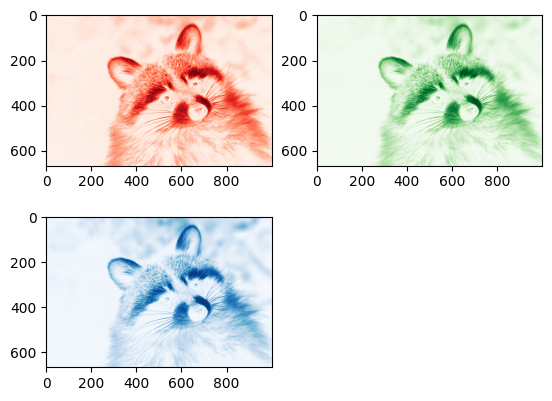

In [80]:
plt.subplot(2,2,1)
plt.imshow(r, cmap='Reds')

plt.subplot(2,2,2)
plt.imshow(g, cmap='Greens')

plt.subplot(2,2,3)
plt.imshow(b, cmap='Blues')

In [94]:
og[:,:,2].shape

(667, 1000)

(667, 1000)


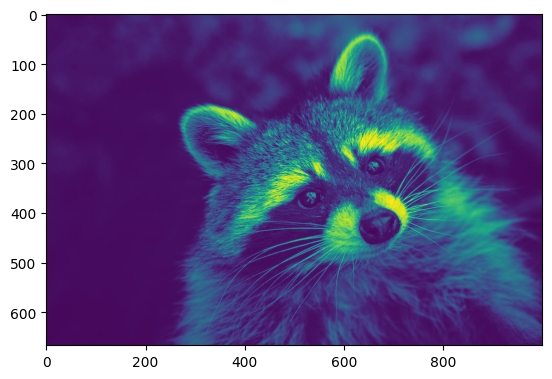

In [91]:
og = np.dstack((r,g,b))
print((og[:,:,1]).shape)
plt.imshow(og[:,:,1])

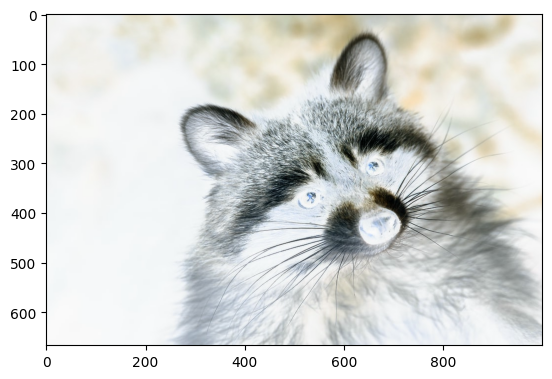

In [ ]:
plt.imshow(np.invert(og))

## Mascaras

In [100]:
mask = np.zeros(og.shape, dtype = np.uint8)

In [101]:
mask[200:500,300:900] = 255

In [102]:
mask.shape

(667, 1000, 3)

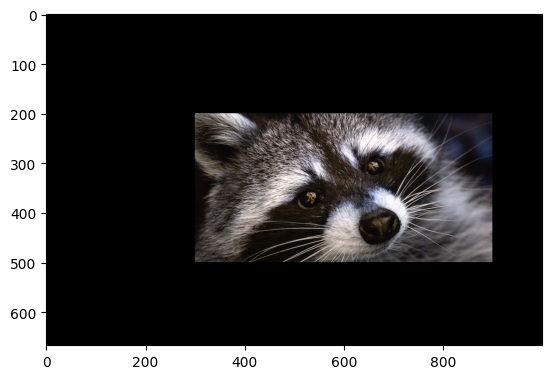

In [103]:
plt.imshow(np.bitwise_and(mask,og))

## Mascaras con geometria

La ecuacion de un circulo es:

$$r^2 = (x - h)^2 + (y - k)^2 $$

donde r es el radio,

(h,k), los centros 

In [106]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

In [107]:
def create_circle_mask(h,w, center, radius):
    Y, X = np.ogrid[:h, :w]
    r = np.sqrt((X - center[0])**2 + (Y-center[1])**2)
    mask = r <=  radius
    return mask

In [110]:
h, w = og.shape[:2]
circle_mask = create_circle_mask(h,w, center = (int(w/2),int(h/3)), radius=h/6)
mask_3d = circle_mask[:, :, None] * np.ones(3, dtype=int)[None, None, :]
copy_og = og.copy()
gray = rgb2gray(copy_og)
gray_masked = gray.copy()
gray_masked = gray_masked * circle_mask

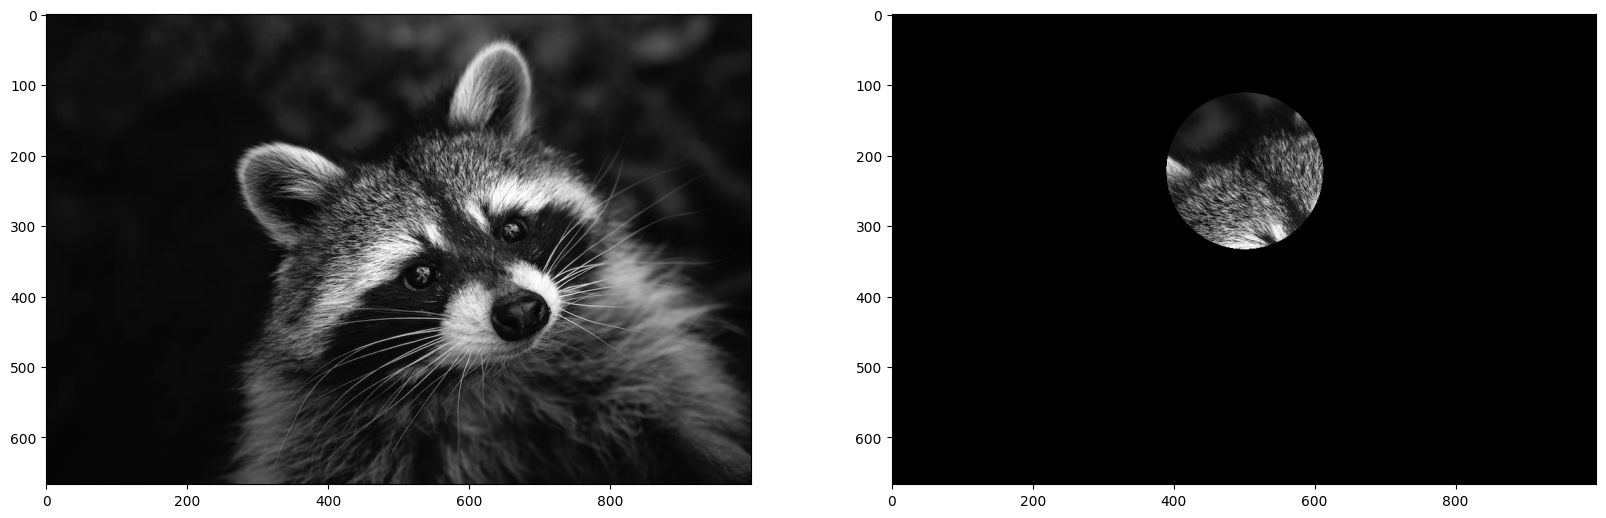

In [111]:
fig, axes = plt.subplots(1,2, figsize=(20,8))
axes = axes.ravel()
axes[0].imshow(gray, cmap='gray')
axes[1].imshow(gray_masked, cmap='gray')

In [112]:
circle_mask.shape

(667, 1000)

## Multiplicacion matricial

Recordemos que para multiplicar matrices tenemos la condicion siguiente:

$$ A = (m * n) $$

y 

$$  B = (n * k) $$

Se pueden multiplicar ya que comparten la dimension n, de lo contrario no es posible realizar la multiplicacion

In [113]:
circle_mask.shape

(667, 1000)

In [115]:
gray.shape

(667, 1000)

In [117]:
(circle_mask.T@gray).shape

(1000, 1000)

In [271]:
circle_mask.shape

(667, 1000)

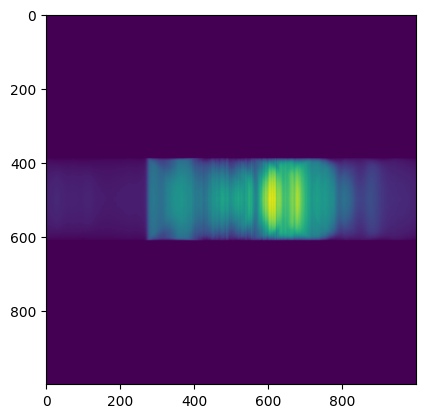

In [119]:
plt.imshow(circle_mask.T@gray )

In [5]:
from scipy.stats import norm
import matplotlib.pyplot as plt

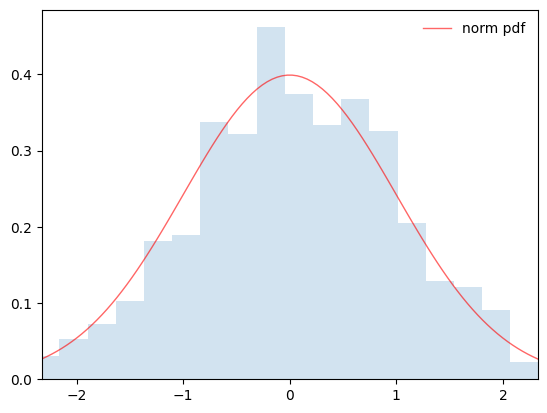

In [16]:
fig, ax = plt.subplots(1, 1)
x = np.linspace(norm.ppf(0.01),
                norm.ppf(0.99), 100)
ax.plot(x, norm.pdf(x),
       'r-', lw=1, alpha=0.6, label='norm pdf')
r = norm.rvs(size=1000)
ax.hist(r, density=True, bins='auto', histtype='stepfilled', alpha=0.2)
ax.set_xlim([x[0], x[-1]])
ax.legend(loc='best', frameon=False)
plt.show()